In [1]:
import mdtraj
import nglview
import prody
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import sys
sys.path.append('/home/diego/Myusr/src/UIBCDFGitHub/LabTools/')
import MolLabTools as mollab
import MDLabTools as mdlab

#sns.set(style="ticks")
plt.style.use(u'ggplot')

/home/diego/Myopt/Miniconda/miniconda3/envs/ENM/lib/python3.6/site-packages/MDAnalysis/due.py:88: UserWarning: No module named 'duecredit'
  warnings.warn(str(err))
/home/diego/Myopt/Miniconda/miniconda3/envs/ENM/lib/python3.6/site-packages/pyemma/__init__.py:91: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.2, you have 2.4.
  .format(latest=latest, current=current), category=UserWarning)


# G6PD

https://www.rcsb.org/structure/2BHL <br>
THE 25 N-TERMINAL RESIDUES HAVE BEEN REMOVED AND THE FIRST RESIDUE IS VALINE, NOT HISTIDINE


https://www.rcsb.org/structure/2BH9 <br>
RESIDUES 26-514


https://www.rcsb.org/structure/5VFL


## 2BHL

In [2]:
pdbs_dir='pdbs/'
pdb_code='2BHL'
pdb_file=pdbs_dir+pdb_code+'.pdb'

In [ ]:
mollab.tools.fetch_pdb_file(pdb_code,destination=pdbs_dir)

In [3]:
mdtraj_sys=mdtraj.load(pdb_file)
print(mdtraj_sys)

<mdtraj.Trajectory with 1 frames, 7903 atoms, 1047 residues, and unitcells>


In [4]:
mdtraj_sys=mdtraj_sys.remove_solvent()
print(mdtraj_sys)

<mdtraj.Trajectory with 1 frames, 7822 atoms, 966 residues, and unitcells>


In [5]:
chains_resids=[]
chains_atoms=[]
for chain in mdtraj_sys.topology.chains:
    aux_res=[]
    aux_at=[]
    for residue in chain.residues:
        aux_res.append(residue.index)
    for atom in chain.atoms:
        aux_at.append(atom.index)
    chains_resids.append(aux_res)
    chains_atoms.append(aux_at)

In [6]:
for chain in mdtraj_sys.topology.chains:
    print(chain.index,chain.n_residues, chain.n_atoms)

0 479 3875
1 479 3879
2 5 40
3 3 28


In [7]:
view = nglview.show_mdtraj(mdtraj_sys)
view.clear()
view.add_cartoon(selection=":A", color='purple')
view.add_cartoon(selection=":B", color='orange')
view.add_spacefill(selection=":C")
view.add_spacefill(selection=":D")
view

NGLWidget()

Tendrá sentido hacer un pdbfix?

# GNM

In [8]:
prody_2bhl = prody.parsePDB(pdb_file)

@> 7903 atoms and 1 coordinate set(s) were parsed in 0.09s.


In [9]:
calphas = prody_2bhl.select('calpha and (chain A or chain B)')

In [11]:
anm = prody.ANM('2BHL')

In [13]:
anm.buildHessian(calphas,cutoff=15.0)

@> Hessian was built in 0.63s.


In [17]:
Hessian=anm.getHessian()

In [18]:
print(Hessian)

[[14.03212721 -2.2516695   0.03525397 ...  0.          0.
   0.        ]
 [-2.2516695  11.92389859 -0.24656401 ...  0.          0.
   0.        ]
 [ 0.03525397 -0.24656401  9.04397421 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 13.0970998   0.44477013
   3.35333602]
 [ 0.          0.          0.         ...  0.44477013  9.96609151
   1.977308  ]
 [ 0.          0.          0.         ...  3.35333602  1.977308
   7.93680869]]


In [19]:
anm.calcModes()

@> 20 modes were calculated in 1.11s.


In [20]:
anm.getEigvals().round(3)

array([0.048, 0.061, 0.079, 0.183, 0.223, 0.246, 0.277, 0.315, 0.443,
       0.501, 0.62 , 0.71 , 0.712, 0.849, 0.967, 0.974, 1.028, 1.107,
       1.29 , 1.323])

In [21]:
anm.getEigvecs().round(3)

array([[ 0.001, -0.005,  0.018, ..., -0.026,  0.006, -0.003],
       [ 0.011,  0.017, -0.039, ..., -0.036,  0.005,  0.041],
       [ 0.037,  0.032,  0.027, ..., -0.008,  0.001,  0.014],
       ...,
       [ 0.004, -0.001, -0.031, ...,  0.034, -0.001, -0.016],
       [-0.02 ,  0.005, -0.006, ...,  0.007, -0.016, -0.022],
       [-0.016,  0.026,  0.014, ..., -0.024,  0.014, -0.011]])

In [22]:
anm.getCovariance().round(2)

array([[ 0.01, -0.01,  0.  , ..., -0.01, -0.  ,  0.  ],
       [-0.01,  0.05, -0.  , ...,  0.01, -0.01, -0.  ],
       [ 0.  , -0.  ,  0.08, ..., -0.01, -0.02, -0.  ],
       ...,
       [-0.01,  0.01, -0.01, ...,  0.02, -0.  , -0.01],
       [-0.  , -0.01, -0.02, ..., -0.  ,  0.01,  0.01],
       [ 0.  , -0.  , -0.  , ..., -0.01,  0.01,  0.04]])

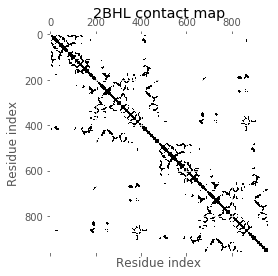

In [23]:
prody.showContactMap(anm)

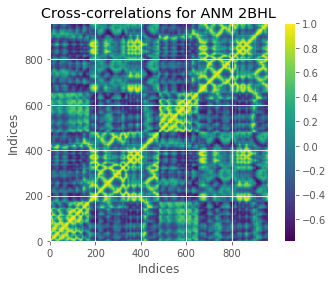

(<matplotlib.image.AxesImage at 0x7fc745f8b940>,
 <matplotlib.colorbar.Colorbar at 0x7fc745ff65c0>)

In [24]:
prody.showCrossCorr(anm)

In [31]:
covariance=anm.getCovariance()

1.0

--------------

In [ ]:
calphas_indices=calphas.getIndices()

In [ ]:
num_calphas=Kirchhoff_matrix.shape[0]

sel_calphas_view=""
for ii in calphas_indices:
    sel_calphas_view+=str(ii)+','
sel_calphas_view=sel_calphas_view[:-1]

positions_calphas=calphas.getCoords()

view = nglview.show_mdtraj(mdtraj_sys)
view.clear()

view.add_cartoon(selection=":A", color='purple')
view.add_cartoon(selection=":B", color='orange')
view.add_spacefill(selection="@"+sel_calphas_view)

for ii in range(num_calphas):
    position_ii=positions_calphas[ii]
    for jj in range(ii+1,num_calphas):
        position_jj=positions_calphas[jj]
        if Kirchhoff_matrix[ii,jj]:
            view.shape.add_cylinder(list(position_ii), list(position_jj), [1.0,0.0,0.0], 0.1)
            #add_cylinder(position1, position2, color, radius, name)
view

In [ ]:
gnm.calcModes(20,zeros=False)

In [ ]:
eigvals=gnm.getEigvals().round(3)
eigvects=gnm.getEigvecs().round(3)

In [ ]:
plt.plot(eigvals)

In [ ]:
num_mode=0
plt.plot(eigvects[:,num_mode])

In [ ]:
gnm.getCovariance().round(2)

In [ ]:
prody.showContactMap(gnm);

In [ ]:
prody.showCrossCorr(gnm);

In [ ]:
hinges = gnm[:2].getHinges

In [ ]:
hinges()

In [ ]:
prody.showMode(gnm[0])

In [ ]:
prody.showSqFlucts(gnm[0], hinge=True)

In [37]:
prody_2bhl.getBetas()

array([79.33, 78.81, 82.91, ..., 34.63, 45.5 , 39.75])

In [39]:
calpha_betas=calphas.getBetas()

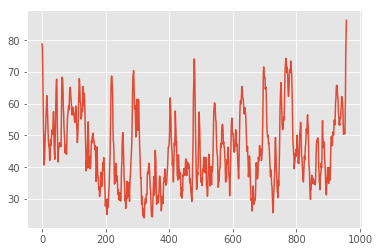

In [40]:
plt.plot(calpha_betas)